In [1]:
%matplotlib inline
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Aufgabe 2

### a)

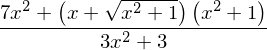

In [2]:
x=symbols('x')
f=(7*x**2+(x+sqrt(x**2+1))*(x**2+1))/(3*(x**2+1))
display(f)

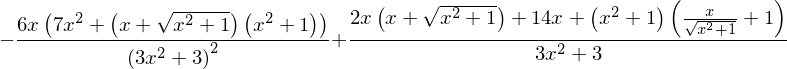

In [3]:
df=f.diff(x)
display(df) # Muss NICHT ausgegeben werden

### b)

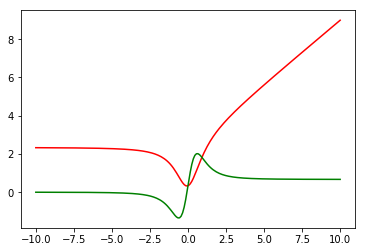

In [4]:
xn=np.linspace(-10,10,200)
plt.plot(xn,lambdify(x,f)(xn),'r',xn,lambdify(x,df)(xn),'g')

Hinweis: Die Farben werden bei **matplotlib** automatisch geändert **'r'** und **'g'** sind also nicht nötig.

Alternative mit **sympy-plot**. Hier müssen die farben explizit geändert werden.

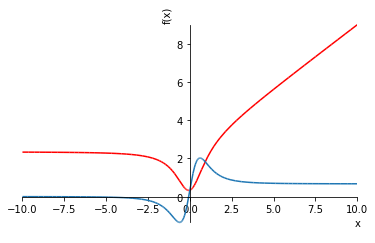

In [5]:
p=plot(f,(x,-10,10),show=False)
p.extend(plot(df,(x,-10,10),show=False))
p[0].line_color='red'
p.show()

### c)

Idee: $g^\pm(x)=a^\pm x+b^\pm$ hat die selbe Steigung wie $f$ in $\lim_{x \to \pm \infty}$. Also entweder

+ $a^\pm=\lim_{x \to \pm \infty}f'(x)$ oder
+ löse $\lim_{x \to \pm \infty}f'(x)-a^\pm$ nach $a^\pm$ auf

In [6]:
a,b=symbols('a b')
am=solve(limit(df-a,x,-oo),a)
ap=solve(limit(df-a,x,oo),a)
display(am)
display(ap)
am=limit(df,x,-oo)
ap=limit(df,x,oo)
display(am)
display(ap)

Idee für $b^\pm$ analog: 

+ $b^\pm=\lim_{x \to \pm \infty}f(x)-a^\pm x$ oder
+ löse $\lim_{x \to \pm \infty}f(x)-(a^\pm+b^\pm)$ nach $b^\pm$ auf

In [7]:
bm=solve(limit(f-(am*x+b),x,-oo),b)
bp=solve(limit(f-(ap*x+b),x,oo),b)
display(bm)
display(bp)
bm=limit(f-(am*x),x,-oo)
bp=limit(f-(ap*x),x,oo)
display(bm)
display(bp)
# Grund für die verschiedenen Varianten:
# varianten zeigen und "siehe unten"
gm=am*xn+bm 
gp=lambda x: ap*x+bp

### d) & e)

*Achtung*: Die Steigung ($a^-$) von $g^-$ ist $0$. Also ist<br>
**gm=am*x+bm** = $\frac{7}{3}$.<br>
Wenn man das lambdifiziert, erhält man 7/3 (als float) und KEIN array (das man für matplotlib braucht). Darauf muss man achten, sonst gibt es eine Fehlermeldung beim plotten.

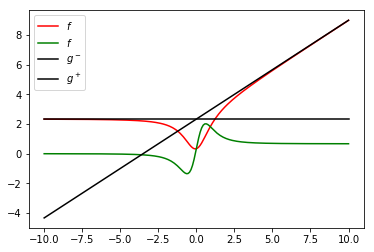

In [8]:
plt.plot(xn,lambdify(x,f)(xn),'r')
plt.plot(xn,lambdify(x,df)(xn),'g')
plt.plot(xn,gm,'k')
plt.plot(xn,gp(xn),'k')
plt.legend(('$f$','$f$','$g^-$','$g^+$'))

Das geht auch mit einem Plotbefehl.

Alternative mit **sympy-plot**:

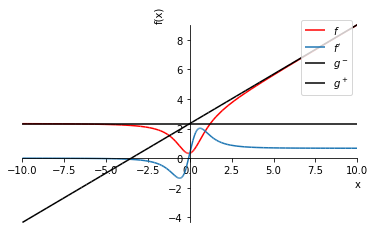

In [9]:
p=plot(f,(x,-10,10),show=False)
p.extend(plot(df,(x,-10,10),show=False))
p.extend(plot(am*x+bm,(x,-10,10),show=False))
p.extend(plot(ap*x+bp,(x,-10,10),show=False))
p[0].line_color='red'
p[2].line_color='black'
p[3].line_color='black'
p[0].label='$f$'
p[1].label="$f'$"
p[2].label='$g^-$'
p[3].label='$g^+$'
p.legend=True
p.show()